In [60]:
###-----librerias-----### 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np #trabajar con arreglos (arrays) y realizar cálculos matemáticos de alto rendimiento
import io #provee las facilidades principales de Python para manejar diferentes tipos de str; stream
import joblib # guardar objetos complejos como modelos de machine learning, arrays, DataFrames
import openpyxl ## exportar archivos; excel

In [46]:
###----Lectura de datos----###
df = pd.read_csv("https://raw.githubusercontent.com/andressj1/Predicci-n-precio-de-m-viles-/refs/heads/main/Datos/train.csv", sep=",")

# Elimación de Variables

In [47]:
# Se elimina 3g porque tiene una categoria muy superior a la otra, igual clock_speed
df.drop(["three_g"], axis=1, inplace=True)
df.drop(["clock_speed"], axis=1, inplace=True)

In [48]:
# Se elimina sc_w porque tiene una correlacción alta con las otras variables, igual la variable pc
df.drop(["sc_w"], axis=1, inplace=True)
df.drop(["pc"], axis=1, inplace=True)
df.drop(["px_height"], axis=1, inplace=True)

# Tratamiento de atipicos

In [49]:
var_num = ['battery_power', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_width', 'ram', 'sc_h', 'talk_time']

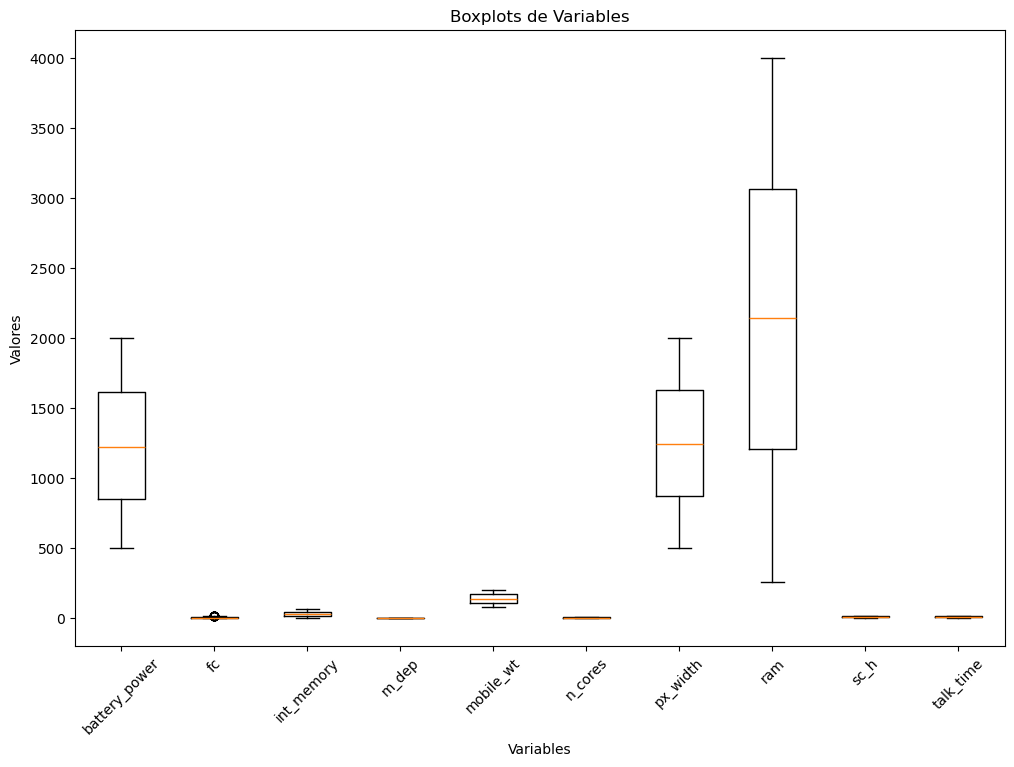

In [50]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Crear los boxplots
ax.boxplot(df[var_num].values, labels=var_num)

# Configurar el título y las etiquetas
ax.set_title('Boxplots de Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar la imagen
plt.show()

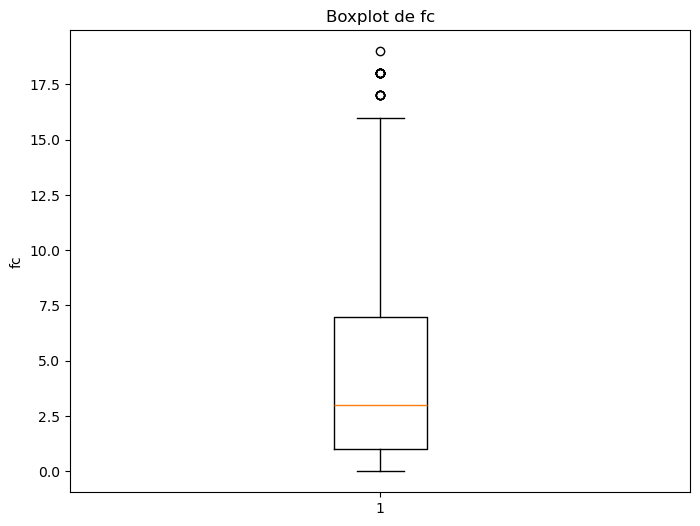

In [51]:
#Caja de bigotes del salario

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el boxplot de MonthlyIncome
ax.boxplot(df['fc'])
ax.set_title('Boxplot de fc')
ax.set_ylabel('fc')

# Mostrar la figura
plt.show()

In [52]:
# Al ser solo 3 datos atipicos se decidio imputarlos
df = df[df['fc'] < 16.0]

# Recategorización

In [53]:
# Altura; de numerica a categorica 
bins = [5,10,15,20] #definicion de intervalos 
labels = ['pequeño','normal','grande'] #etiquetas de intervalos 
df['tamaño'] = pd.cut(df['sc_h'], bins=bins, labels=labels)

df.drop(["sc_h"], axis=1, inplace=True)

In [54]:
# Ram; de numerica  a categorica
bins = [200,2000,3000,4000]
labels_1 = ['2GB','3GB','4GB']
df['ram_cat'] = pd.cut(df['ram'], bins=bins, labels=labels_1)

df.drop(["ram"], axis=1, inplace=True)

In [58]:
# Peso; de numerica  a categorica
bins = [80,140,204]
labels_2 = ['pesado','liviano']
df['mobile_wt_cat'] = pd.cut(df['mobile_wt'], bins=bins, labels=labels_2)

df.drop(["mobile_wt"], axis=1, inplace=True)

In [59]:
df.head(3)

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,n_cores,px_width,talk_time,touch_screen,wifi,price_range,tamaño,ram_cat,mobile_wt_cat
0,842,0,0,1,0,7,0.6,2,756,19,0,1,1,pequeño,3GB,liviano
1,1021,1,1,0,1,53,0.7,3,1988,7,1,0,2,grande,3GB,pesado
2,563,1,1,2,1,41,0.9,5,1716,9,1,0,2,normal,3GB,liviano


In [62]:
# Exportar base final 
df.to_csv("Datos\\df_fin", index=False, encoding='utf-8')